# **Mini Project 5: 대출 위험도 평가** 

# 1. EDA

## Data load & Analysis

In [ ]:
# for colab
# cd '/content/drive/MyDrive'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('cs_data.csv', index_col=0)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [ ]:
data.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


Text(0.5, 1.0, 'Binary Class Comparison')

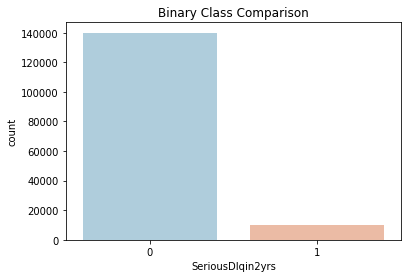

In [ ]:
sns.countplot(x='SeriousDlqin2yrs', data=data, palette='RdBu_r')
plt.title('Binary Class Comparison')

In [ ]:
data['NumberOfTime60-89DaysPastDueNotWorse'].value_counts()

0     142396
1       5731
2       1118
3        318
98       264
4        105
5         34
6         16
7          9
96         5
8          2
11         1
9          1
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: int64

In [ ]:
data['NumberOfTimes90DaysLate'].value_counts()

0     141662
1       5243
2       1555
3        667
4        291
98       264
5        131
6         80
7         38
8         21
9         19
10         8
11         5
96         5
13         4
12         2
14         2
15         2
17         1
Name: NumberOfTimes90DaysLate, dtype: int64

In [ ]:
data['NumberOfTime30-59DaysPastDueNotWorse'].value_counts()

0     126018
1      16033
2       4598
3       1754
4        747
5        342
98       264
6        140
7         54
8         25
9         12
96         5
10         4
12         2
13         1
11         1
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64

In [ ]:
data['NumberOfDependents'].value_counts()

0.0     86902
1.0     26316
2.0     19522
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
9.0         5
10.0        5
13.0        1
20.0        1
Name: NumberOfDependents, dtype: int64

### **Analysis**
- 먼저 data를 load하면서 전체적인 요소 및 값들의 분포를 파악했다.

- 첫 번째로 target data (SeriousDlqin2yrs)에 대한 불균형도가 심한 것을 확인 할 수 있다. 이는 추후에 불균형된 학습을 유발 할 수 있으므로, 이를 해소하기 위한 방법으로 imblearn에서 SMOTE 모듈을 이용해 oversampling 통해서 어느 정도 해소해볼 예정이다.

- 두 번째로 돈을 연체하게 된 data를 살펴 보았는데, 96과 98이라는 이상치로 보이는 숫자가 있어 이를 값을 대체하거나 삭제할 예정이다.

## Data Visualization
- Data의 각종 요소별 시각화를 진행했다.

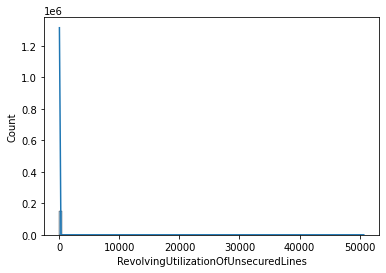

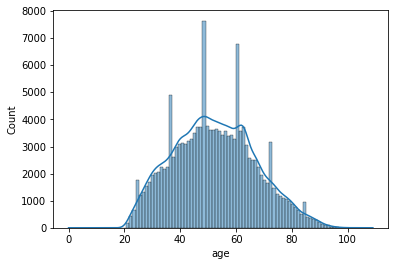

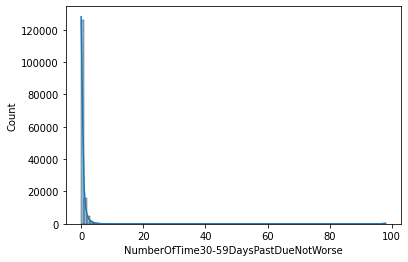

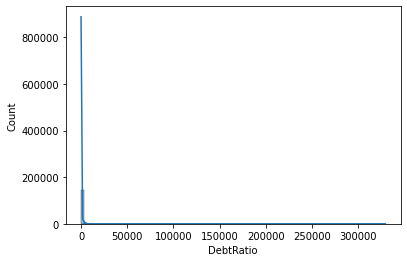

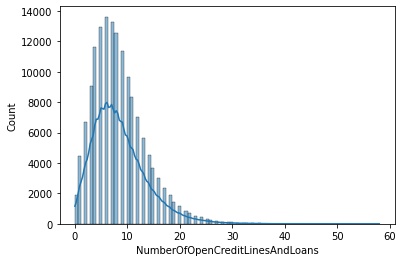

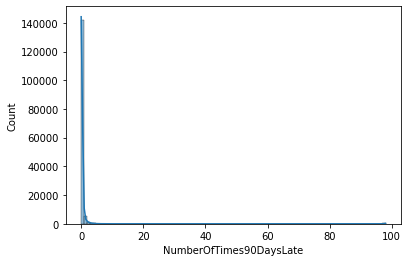

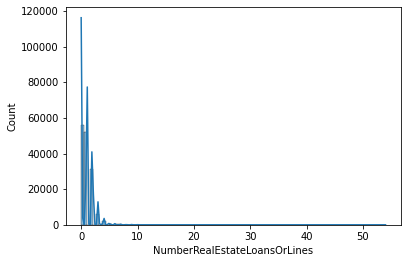

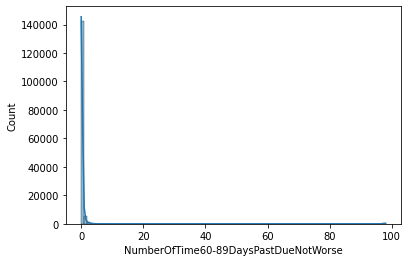

In [ ]:
# remove target variable Dlqin2yrs and variables with missing values
feature_list = list(data.columns.values)
remove_list = ['SeriousDlqin2yrs','MonthlyIncome','NumberOfDependents']
for each in remove_list:
    feature_list.remove(each)

for each in feature_list:
    sns.histplot(data[each], kde=True, bins=100)
    plt.show()

**Analysis**
- RevolvingUtilizationOfUnsecuredLines
- NumberOfTime30-59DaysPastDueNotWorse
- DebtRatio
- NumberOfTimes30DaysLate
- NumberRealEstateLoansOrLines
- NumberOfTime60-89DaysPastDueNotWorse

위의 6가지 속성에 대해서는 매우 편향된 분포를 가지고 있음을 파악할 수 있었다.

### DebtRatio (Boxplot)

In [ ]:
data['DebtRatio'].value_counts()

0.000000    4113
1.000000     229
4.000000     174
2.000000     170
3.000000     162
            ... 
0.367271       1
0.037634       1
0.755290       1
0.457568       1
0.656276       1
Name: DebtRatio, Length: 114194, dtype: int64

In [ ]:
data[data['DebtRatio'] > 1].value_counts()

SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  NumberOfTime30-59DaysPastDueNotWorse  DebtRatio    MonthlyIncome  NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  NumberOfDependents
1                 3818.000000                           39   2                                     1.154265     3668.0         12                               1                        2                             0                                     0.0                   1
0                 0.105818                              72   0                                     1.668262     626.0          10                               0                        0                             0                                     1.0                   1
                  0.102986                              45   0                                     2431.000000  0.0            6                                0             

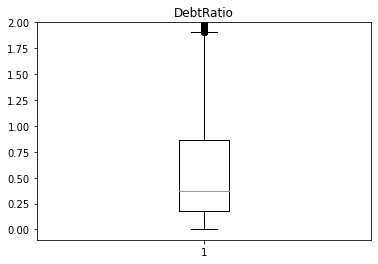

In [ ]:
plt.boxplot(data['DebtRatio'])
plt.title('DebtRatio')
plt.ylim(-0.1, 2)
plt.show()

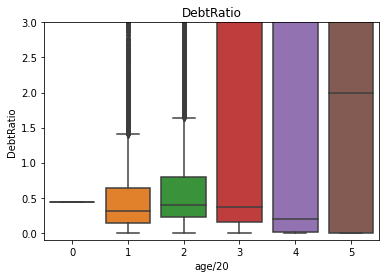

In [ ]:
data_sample = data.copy()
data_sample['age/20'] = data_sample[['age']].applymap(lambda x : int(x/20))
sns.boxplot(x='age/20', y='DebtRatio', data=data_sample)
plt.title('DebtRatio')
plt.ylim(-0.1, 3.0)
plt.show()

In [ ]:
data_sample[(data_sample['age/20']>=3) & (data_sample['DebtRatio']>1.)].describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,age/20
count,14056.000000,14056.000000,14056.000000,14056.000000,14056.000000,1934.000000,14056.000000,14056.000000,14056.000000,14056.000000,12228.000000,14056.000000
mean,0.029240,4.702026,69.641577,0.149260,1348.151022,2236.593588,8.244806,0.050797,0.938745,0.041121,0.166667,3.131759
std,0.168485,146.801266,7.879031,0.995645,4683.580781,3121.107817,5.183441,0.893541,1.218564,0.860461,0.531369,0.339710
min,0.000000,0.000000,60.000000,0.000000,1.000874,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,0.000000,0.013231,63.000000,0.000000,36.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,0.000000,0.050383,68.000000,0.000000,666.000000,1400.000000,7.000000,0.000000,1.000000,0.000000,0.000000,3.000000
75%,0.000000,0.213127,75.000000,0.000000,1868.000000,3232.250000,11.000000,0.000000,1.000000,0.000000,0.000000,3.000000
max,1.000000,11553.000000,109.000000,98.000000,329664.000000,70000.000000,45.000000,98.000000,32.000000,98.000000,6.000000,5.000000


In [ ]:
data.loc[data['age'] == 0, 'age'] = data['age'].median()

### **Analysis**
violin plot을 이용하여 연령별 DebtRatio를 파악해보았다. 그 결과, 60대 이상 (3번째 boxplot)에서 DebtRatio가 1을 넘어가는 값을 보였다. 이를 통해 data값이 잘못된 것일 지, 이 나이대에 특성이 그러한 지를 파악해 볼 필요가 있어 보였다.

그리고 추가적으로 나이가 '0'인 값에 대해서는 있을 수 없는 값으로 판단하여, 중간값으로 대체했다.

### RevolvingUtilizationOfUnsecuredLines (Boxplot)

In [ ]:
data['RevolvingUtilizationOfUnsecuredLines'].describe()

count    150000.000000
mean          6.048438
std         249.755371
min           0.000000
25%           0.029867
50%           0.154181
75%           0.559046
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [ ]:
data[data['RevolvingUtilizationOfUnsecuredLines'] > 1].value_counts()

SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  NumberOfDependents
1                 6190.000000                           27   0                                     0.478532   1280.0         6                                0                        0                             1                                     1.0                   1
0                 1.068493                              25   1                                     0.129968   4100.0         2                                0                        0                             0                                     0.0                   1
                  1.069572                              45   0                                     0.019954   4810.0         2                                0                     

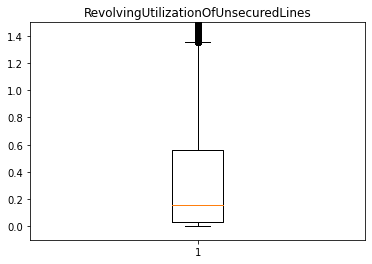

In [ ]:
plt.boxplot(data['RevolvingUtilizationOfUnsecuredLines'])
plt.title('RevolvingUtilizationOfUnsecuredLines')
plt.ylim(-0.1, 1.5)
plt.show()

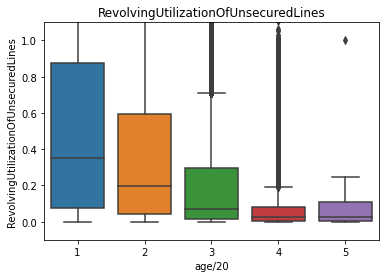

In [ ]:
data_sample = data.copy()
data_sample['age/20'] = data_sample[['age']].applymap(lambda x : int(x/20))
sns.boxplot(x='age/20', y='RevolvingUtilizationOfUnsecuredLines', data=data_sample)
plt.title('RevolvingUtilizationOfUnsecuredLines')
plt.ylim(-0.1, 1.1)
plt.show()

### **Analysis**
위와 마찬가지로 boxplot을 이용해 연령별로 현재 운용 가능한 현금의 비율을 살펴 보았다. 물론 비율이 1을 넘어가는 값은 이상치라고 생각되며, 적절한 값으로 대체를 하거나 삭제할 필요성은 있어 보인다. 연령은 높아질 수로 현재 운용가능한 현금의 비율이 낮아지는 것을 확인 할 수 있었고, 40~80대에서는 이상치로 판단 되는 값이 많은 것을 또한 확인했다.

### Age (Pie chart)

In [ ]:
age_df = pd.DataFrame(data.age)
age_df.head()

,age
1,45
2,40
3,38
4,30
5,49


In [ ]:
# 20살 단위로 group화
age_df['age/20'] = age_df[['age']].applymap(lambda x : int(x/20))
age_df_count = age_df.groupby(['age/20'])['age/20'].count()
age_df_count.index = ['20<=age<40', '40<=age<60', '60<=age<80', '80<=age<100', '100<=age']
age_df_count.column = ['count']
age_df_count

20<=age<40     32003
40<=age<60     69679
60<=age<80     42506
80<=age<100     5799
100<=age          13
Name: age/20, dtype: int64

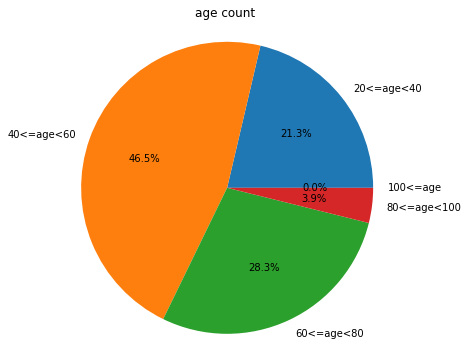

In [ ]:
# data visualization
plt.figure(figsize=(7, 6))
plt.pie(age_df_count.values, labels=age_df_count.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('age count')
plt.show()

### **Analysis**
전체적인 나이 분포를 확인해본 결과, 40 ~ 60살 정도가 46.5% 이상의 높은 비율을 가지고 있었고 다음으로 60 ~ 80살이 28.3%로 40살 이상에서 약 75%가 넘는 분포를 가지고 있었다. 그 다음으로 20 ~ 40살 정도에서 약 21%의 비율을 차지했음을 알 수 있었다.

### SeriousDlqin2yrs (Violin Plot)

In [ ]:
df_SeriousDlqin2yrs = pd.DataFrame(data.SeriousDlqin2yrs)
df_SeriousDlqin2yrs.head()

,SeriousDlqin2yrs
1,1
2,0
3,0
4,0
5,0


In [ ]:
data['NumberOfTime60-89DaysPastDueNotWorse'].value_counts()

0     142396
1       5731
2       1118
3        318
98       264
4        105
5         34
6         16
7          9
96         5
8          2
11         1
9          1
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


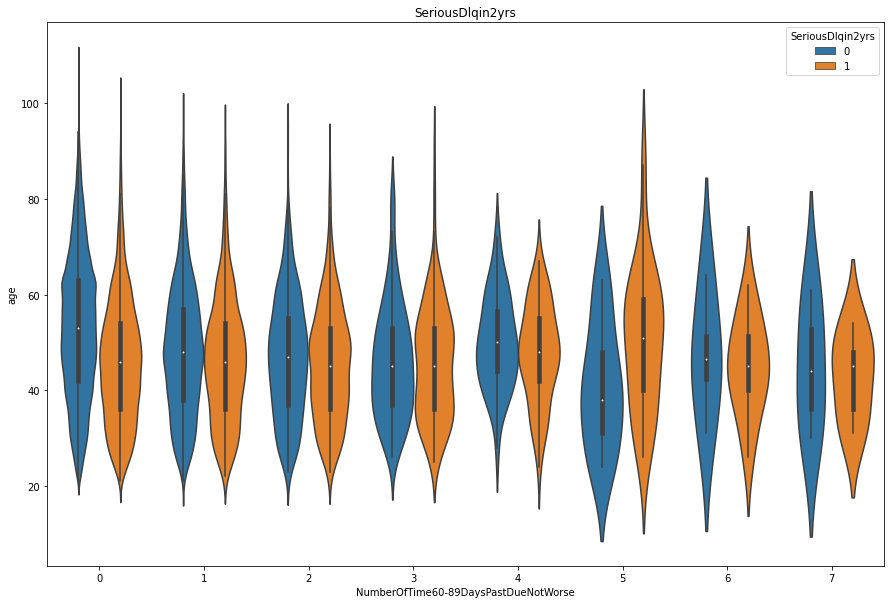

In [ ]:
plt.figure(figsize=(15, 10))
sns.violinplot('NumberOfTime60-89DaysPastDueNotWorse', 'age', hue='SeriousDlqin2yrs', data=data[data['NumberOfTime60-89DaysPastDueNotWorse'] < 8])
plt.title('SeriousDlqin2yrs')
plt.show()

### **Analysis**
violin plot을 이용하여 최근 2년간 60 ~ 89일 연체한 횟수에 따른 2년 동안 90일 이상 연체 여부를 파악해보려고 했다. 하지만 위의 그림과 같이 60 ~ 89일 연체한 횟수에 대해 이상치 (outlier)로 보이는 것이 탐지가 되었다.

이를 value_counts()를 통해서 다시 본 결과, 2년간 연체한 횟수가 98, 96번이라는 답변이 **264명과 5명**으로 조사되어 있다는 것을 파악했다. 이에 대한 값을 아예 **삭제를 할 것인지, 아니면 값을 대체할 지를** 결정이 필요해 보인다.

그리고 그림을 통해서 outlier 등을 제외한 나머지 분포를 살펴보았을 때에, 연체를 한 사람이 **가운데 연령대**에서 조금 더 높은 비율을 가진 것을 확인했습니다.

## 결측치 파악

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [ ]:
data.isna().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

### **Analysis**
결측치 (NA)에 대한 분석이다. 총 2개의 요소에서 결측치가 발생했다. (MonthlyIncome, NumberOfDependents) 특히, 월 수입에 대한 결측치는 거의 3만개에 가까운 숫자이기에 삭제하기에는 무리가 있다고 판단되었다. 그리고 부양 가족의 수도 그냥 삭제하기 보다는 데이터 전체의 평균 등으로 대체하여 사용할 예정이다.

구체적으로 위의 상관 관계(heat map)에서 볼 수 있듯이, MonthlyIncome은 NumberRealEstateLoansOrLines에서 그나마 높은 상관 관계를 가지기에 각 값 별로 가지고 있는 월 평균 수입을 MonthlyIncome 값으로 대체할 예정이다.

다음으로 NumberOfDependents의 경우, age와 음의 상관 관계이지만 관련성이 높아 보이므로 나이대에 따른 NumberOfDependents를 적용하거나 삭제할 예정이다.

## Data preprocessing

In [ ]:
preprocessing_data = data.copy()
preprocessing_data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


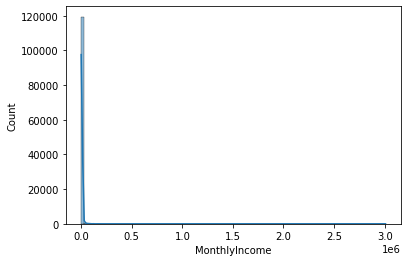

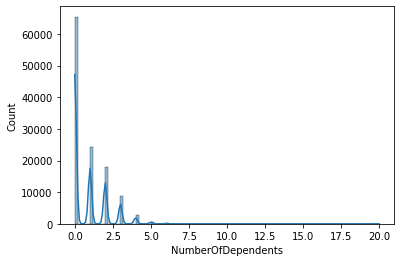

In [ ]:
partial_preprocessing_data = preprocessing_data[['MonthlyIncome','NumberOfDependents']]
#partial_preprocessing_data.dropna(how='any')
partial_preprocessing_data = partial_preprocessing_data.dropna(how='any')

sns.histplot(partial_preprocessing_data['MonthlyIncome'], kde=True, bins=100)
plt.show()
sns.histplot(partial_preprocessing_data['NumberOfDependents'], kde=True, bins=100)
plt.show()

### 결측치 처리 : NumberOfDependents

In [ ]:
preprocessing_data['age/10'] = preprocessing_data[['age']].applymap(lambda x : int(x/10))
preprocessing_data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,age/10
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,4
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,4
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,3
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,3
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,4


In [ ]:
mean_df = preprocessing_data.groupby('age/10')['NumberOfDependents'].mean()
mean_df = round(mean_df)
mean_df

age/10
2     0.0
3     1.0
4     1.0
5     1.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
Name: NumberOfDependents, dtype: float64

In [ ]:
# NumberOfDependents의 결측치 채우기
for j in range(0, 11):
    for i in mean_df:
        preprocessing_data.loc[(preprocessing_data['NumberOfDependents'].isnull()) & (preprocessing_data['age/10'] == j),
                    'NumberOfDependents'] = round(i)

In [ ]:
preprocessing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    150000 non-null  float64
 11  

### 결측치 처리 : MonthlyIncome

In [ ]:
mean_df1 = preprocessing_data.loc[preprocessing_data['SeriousDlqin2yrs'] == 0, 'MonthlyIncome'].groupby(preprocessing_data['age/10']).mean()
mean_df1, mean_df1.shape

(age/10
 2     2999.883430
 3     5577.010729
 4     7319.504950
 5     7854.726798
 6     7488.072723
 7     5768.068784
 8     5313.903383
 9     5757.194366
 10    1996.800000
 Name: MonthlyIncome, dtype: float64, (9,))

In [ ]:
mean_df2 = preprocessing_data.loc[preprocessing_data['SeriousDlqin2yrs'] == 1, 'MonthlyIncome'].groupby(preprocessing_data['age/10']).mean()
mean_df2, mean_df2.shape

(age/10
 2     2898.832524
 3     5000.628413
 4     6131.941922
 5     6683.833684
 6     6105.761176
 7     5363.187500
 8     4582.025316
 9     8938.375000
 10    2883.000000
 Name: MonthlyIncome, dtype: float64, (9,))

In [ ]:
# MonthlyIncome 결측치 채우기

for i in mean_df1:
  for j in range(2, 11):
    preprocessing_data.loc[(preprocessing_data['SeriousDlqin2yrs'] == 0) & (preprocessing_data['MonthlyIncome'].isnull()) & (preprocessing_data['age/10'] == j),
              'MonthlyIncome'] = i

for i in mean_df2:
  for j in range(2, 11):
    preprocessing_data.loc[(preprocessing_data['SeriousDlqin2yrs'] == 1) & (preprocessing_data['MonthlyIncome'].isnull()) & (preprocessing_data['age/10'] == j),
              'MonthlyIncome'] = i

In [ ]:
preprocessing_data.drop('age/10', axis=1, inplace=True)
preprocessing_data.shape

(150000, 11)

In [ ]:
preprocessing_data.isna().any()

SeriousDlqin2yrs                        False
RevolvingUtilizationOfUnsecuredLines    False
age                                     False
NumberOfTime30-59DaysPastDueNotWorse    False
DebtRatio                               False
MonthlyIncome                           False
NumberOfOpenCreditLinesAndLoans         False
NumberOfTimes90DaysLate                 False
NumberRealEstateLoansOrLines            False
NumberOfTime60-89DaysPastDueNotWorse    False
NumberOfDependents                      False
dtype: bool

### Result
NumberOfDependents와 MonthlyIncome의 결측치를 위와 같이 다 채우는 방향으로 진행하였다.

구체적으로 NumberOfDependents의 경우에는 age를 10살 기준으로 나누어 각 평균값을 구하고, 각 나이가 해당되는 연령의 결측치에 평균값(int)으로 채웠다.

다음으로 MonthlyIncome는 SeriousDlqin2yrs와 연령별 기준에 대한 MonthlyIncome 평균값을 구했다. 이를 각 해당하는 대출 건수에 대한 결측치를 채웠다.

## Outlier (이상치)

In [ ]:
def get_outlier(df=None, column=None, weight=1.5):
  # target 값과 상관관계가 높은 열을 우선적으로 진행
  quantile_25 = np.percentile(df[column].values, 25)
  quantile_75 = np.percentile(df[column].values, 75)

  IQR = quantile_75 - quantile_25
  
  lowest = quantile_25 - IQR*weight
  highest = quantile_75 + IQR*weight
  lowest_outlier_idx = df[column][df[column] < lowest].index
  highest_outlier_idx = df[column][df[column] > highest].index
  return lowest, highest, lowest_outlier_idx, highest_outlier_idx

### 이상치 제거 : RevolvingUtilizationOfUnsecuredLines

- Data 이상치라고 판단되는 값을 Max. value로 대체함

In [ ]:
# replace value
preprocessing_data.loc[preprocessing_data['RevolvingUtilizationOfUnsecuredLines'] > 1., 'RevolvingUtilizationOfUnsecuredLines'] = 1.

In [ ]:
# 결과 확인
preprocessing_data[preprocessing_data['RevolvingUtilizationOfUnsecuredLines'] > 1.].value_counts()

Series([], dtype: int64)

### 이상치 제거 : DebtRatio

- Data의 속성상 **Highest** 이상의 숫자는 이상치를 대체함

In [ ]:
# lowest, highest value 및 index 확인
lowest, highest, lowest_outlier_idx, highest_outlier_idx = get_outlier(preprocessing_data, 'DebtRatio')
lowest, highest, lowest_outlier_idx, highest_outlier_idx

(-0.8646960792499998,
 1.9080236847499998,
 Int64Index([], dtype='int64'),
 Int64Index([     7,      9,     15,     17,     33,     42,     45,     51,
                 59,     63,
             ...
             149961, 149964, 149966, 149968, 149976, 149977, 149978, 149985,
             149993, 149998],
            dtype='int64', length=31311))

In [ ]:
# 이상치 값을 highest로 대체
preprocessing_data.loc[highest_outlier_idx, 'DebtRatio'] = highest

In [ ]:
# 결과 확인
preprocessing_data.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,0.066840,0.319196,52.295553,0.421033,0.663258,5.941611e+03,8.452760,0.265973,1.018240,0.240387,0.737413
std,0.249746,0.349481,14.771249,4.192781,0.688085,1.296355e+04,5.145951,4.169304,1.129771,4.155179,1.107021
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,2.999883e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,4.357500e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,7.400000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,1.000000,109.000000,98.000000,1.908024,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


### 이상치 제거  : NumberOfTimes90DaysLate

- 위에서 확인한 것과 같이 96번과 98번 연체 횟수는 기간적 측면에서 볼 때 말이 되지 않는 값이라 outlier로 판단하고 데이터의 수 측면에서 크지 않다고 생각되어 삭제한다.

In [ ]:
preprocessing_data[(preprocessing_data['NumberOfTimes90DaysLate'] == 98 ) | (preprocessing_data['NumberOfTimes90DaysLate'] == 96)].describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,269.000000,2.690000e+02,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.0,269.000000,269.000000
mean,0.546468,9.999999e-01,34.245353,97.962825,0.202212,2732.623375,0.007435,97.962825,0.0,97.962825,0.327138
std,0.498764,2.891960e-15,13.061823,0.270628,0.582814,2043.114944,0.086065,0.270628,0.0,0.270628,0.789889
min,0.000000,9.999999e-01,21.000000,96.000000,0.000000,0.000000,0.000000,96.000000,0.0,96.000000,0.000000
25%,0.000000,9.999999e-01,24.000000,98.000000,0.000000,2000.000000,0.000000,98.000000,0.0,98.000000,0.000000
50%,1.000000,9.999999e-01,29.000000,98.000000,0.000000,2898.832524,0.000000,98.000000,0.0,98.000000,0.000000
75%,1.000000,9.999999e-01,43.000000,98.000000,0.000000,2999.883430,0.000000,98.000000,0.0,98.000000,0.000000
max,1.000000,9.999999e-01,79.000000,98.000000,1.908024,28733.000000,1.000000,98.000000,0.0,98.000000,5.000000


In [ ]:
# 삭제할 index 추출 & 삭제
data_del_idx = preprocessing_data[(preprocessing_data['NumberOfTimes90DaysLate'] == 98) | (preprocessing_data['NumberOfTimes90DaysLate'] == 96)].index
preprocessing_data.drop(data_del_idx, inplace=True)
data_del_idx.shape, preprocessing_data.shape

((269,), (149731, 11))

In [ ]:
# 결과 확인
preprocessing_data['NumberOfTimes90DaysLate'].value_counts()

0     141662
1       5243
2       1555
3        667
4        291
5        131
6         80
7         38
8         21
9         19
10         8
11         5
13         4
15         2
12         2
14         2
17         1
Name: NumberOfTimes90DaysLate, dtype: int64

### Result

- 각 속성에서 이상치로 판단 되는 값을 삭제 또는 대체하는 방향으로 진행.
 추가적으로 NumberRealEstateLoansOrLines에 54건수에 대한 데이터가 이상치로 보이지만 큰 영향은 안 줄 것으로 판단하고 진행했으며, 아래와 같이 정제된 data를 통해 다시 descibe 및 correlation을 파악하는 과정을 거침.

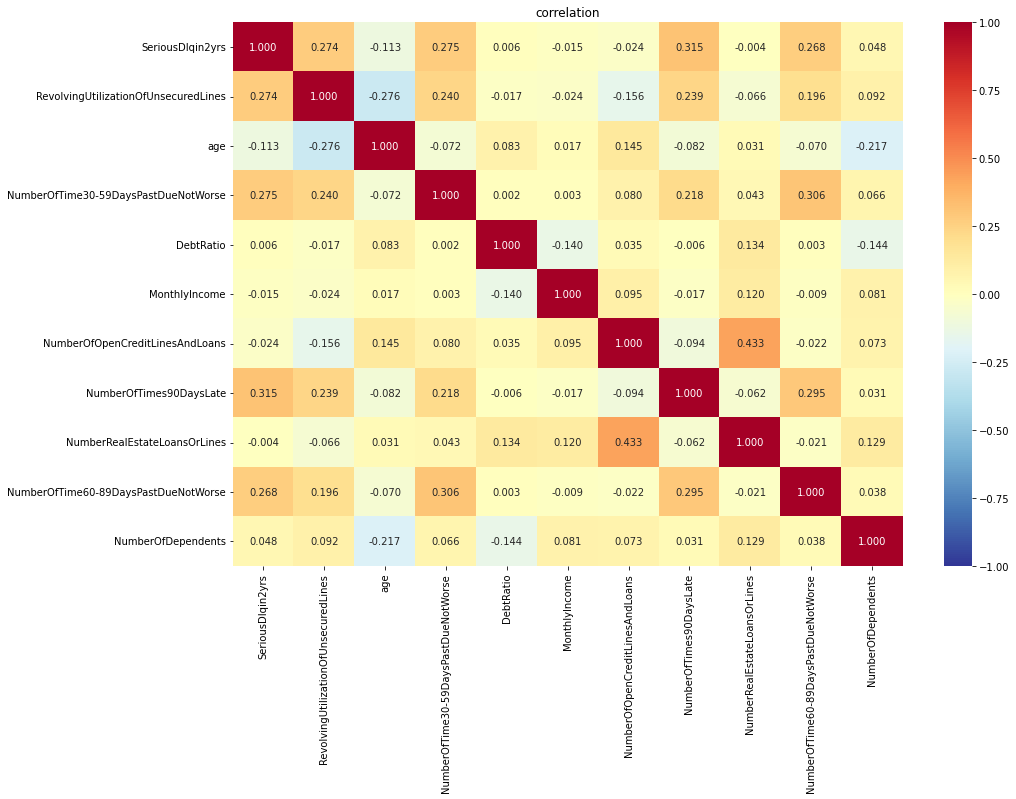

In [ ]:
# column 별 상관 관계 분석
df_corr = preprocessing_data.corr()

plt.figure(figsize=(15, 10))
plt.title('correlation')
sns.heatmap(df_corr, 
            annot = True,      
            cmap = 'RdYlBu_r',
            fmt='.3f',
            vmin = -1, vmax = 1)

In [ ]:
preprocessing_data.to_csv('preprocessing_data_v01.csv', index=False)

### **Analysis**
각 요소들의 상관관계에 관한 heatmap은 위의 그림과 같다.

양의 상관 관계에서는 대표적으로 주택 담보대출을 포함한 부동산 담보 대출 건수(NumberRealEstateLoansOrLines)와 대출자가 보유중인 담보 대출 및 신용 대출 건수(NumberOfOpenCreditLinesAndLoans)가 **0.43** 정도의 상관 관계를 보였다.

다음으로 음의 상관 관계는 대표적으로 주택 담보대출을 포함한 부동산 담보 대출 건수 (NumberRealEstateLoansOrLines)와 나이(age)가 **-0.275** 정도를 보였음을 확인 할 수 있었다.

# 2. Base line model

## 결측치 Preprocessing 적용한 Data 활용

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline, make_pipeline


from imblearn.over_sampling import SMOTE

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, plot_roc_curve, plot_confusion_matrix, roc_auc_score

In [ ]:
preprocessing_data = pd.read_csv('preprocessing_data_v01.csv')
preprocessing_data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [ ]:
X = preprocessing_data.drop('SeriousDlqin2yrs', axis=1)
y = preprocessing_data['SeriousDlqin2yrs']

X.shape, y.shape

((149731, 10), (149731,))

In [ ]:
# train / validataion / test set split & imbalanced data processing
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=157,
                                                    stratify=y
                                                    )

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                test_size=0.2,
                                                random_state=157,
                                                stratify=y_train
                                                )

smt = SMOTE(random_state=157)
X_train, y_train = smt.fit_resample(X_train, y_train)

X_train.shape, X_val.shape, X_test.shape

((179010, 10), (23957, 10), (29947, 10))

In [ ]:
scaler = StandardScaler()

knn = make_pipeline(scaler, KNeighborsClassifier())
lr = make_pipeline(scaler, LogisticRegression(max_iter=2000, random_state=0))
rf = RandomForestClassifier(random_state=0)
grb = GradientBoostingClassifier(random_state=0)
xgb = XGBClassifier(random_state=0)

In [ ]:
knn.fit(X_train, y_train)
lr.fit(X_train, y_train)
xgb.fit(X_train, y_train)
grb.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
base_line = [knn, lr, xgb, grb, rf]
model_names = ['KNN', 'LogisticRegression', 'XGBoost', 'GradientBoosting', 'RandomForest']

In [ ]:
for model, name in zip(base_line, model_names):
    if name == 'KNN':
        continue
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    pred_train_proba = model.predict_proba(X_train)
    pred_test_proba = model.predict_proba(X_test)
    
    acc_train = np.round(accuracy_score(y_train,pred_train),3)
    acc_test = np.round(accuracy_score(y_test, pred_test), 3)
    
    auc_train = np.round(roc_auc_score(y_train, pred_train_proba[:, 1]), 3)
    auc_test = np.round(roc_auc_score(y_test, pred_test_proba[:, 1]), 3)
    
    print(f'{name}')
    print(f'train정확도:{acc_train}, Test정확도:{acc_test}\t train AUC:{auc_train}, Test AUC:{auc_test}')
    print('='*50)

LogisticRegression
train정확도:0.754, Test정확도:0.759	 train AUC:0.83, Test AUC:0.842
XGBoost
train정확도:0.887, Test정확도:0.885	 train AUC:0.959, Test AUC:0.862
GradientBoosting
train정확도:0.888, Test정확도:0.889	 train AUC:0.961, Test AUC:0.868
RandomForest
train정확도:1.0, Test정확도:0.908	 train AUC:1.0, Test AUC:0.862


### Results
처음 데이터의 경우, 불균형 데이터임을 확인하였기에, 이를 조금 해소하고자 train data에 SMOTE를 통해서 불균형을 어느정도 해소를 했다.

GradientBoostingClassifier, RandomForestClassifier, LogisticRegression, KNeighborsClassifier, XGBClassifier 등의 model들을 활용했다. roc_auc_score는 대부분 **0.84 ~ 0.86**정도의 score를 가진 것을 확인했다.

# 3. Hyper-parameter Tuning

In [ ]:
grb = GradientBoostingClassifier(random_state=157)

param = {
    'learning_rate': [0.1, 0.5, 1],
    'n_estimators':range(100, 501, 100),
    'max_depth': range(1, 4),
    'subsample':[0.5, 0.8, 1]
}

gs = RandomizedSearchCV(grb, 
                  param, 
                  scoring='roc_auc',
                  cv=4,
                  n_iter=60,
                  n_jobs=-1)

gs.fit(X_train, y_train)

RandomizedSearchCV(cv=4, estimator=GradientBoostingClassifier(random_state=157),
                   n_iter=60, n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.5, 1],
                                        'max_depth': range(1, 4),
                                        'n_estimators': range(100, 501, 100),
                                        'subsample': [0.5, 0.8, 1]},
                   scoring='roc_auc')

In [73]:
gs.best_estimator_, gs.best_score_

(GradientBoostingClassifier(learning_rate=0.5, n_estimators=500,
                            random_state=157, subsample=1), 0.969740876237992)

In [74]:
df = pd.DataFrame(gs.cv_results_).sort_values('rank_test_score')
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_n_estimators,param_max_depth,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
30,146.224506,0.568550,0.336336,0.003243,1,500,3,0.5,"{'subsample': 1, 'n_estimators': 500, 'max_dep...",0.941013,0.979260,0.979488,0.979202,0.969741,0.016587,1
5,118.425019,1.055361,0.280186,0.004697,1,400,3,0.5,"{'subsample': 1, 'n_estimators': 400, 'max_dep...",0.940439,0.978566,0.978812,0.978440,0.969064,0.016527,2
10,146.783191,0.499268,0.342001,0.006228,1,500,3,1,"{'subsample': 1, 'n_estimators': 500, 'max_dep...",0.939917,0.978117,0.978603,0.979131,0.968942,0.016761,3
59,126.776067,0.331248,0.293605,0.045393,0.8,500,3,0.5,"{'subsample': 0.8, 'n_estimators': 500, 'max_d...",0.941827,0.977538,0.976386,0.979094,0.968711,0.015551,4
57,87.732888,0.226239,0.216831,0.003192,1,300,3,0.5,"{'subsample': 1, 'n_estimators': 300, 'max_dep...",0.939777,0.977484,0.977699,0.977563,0.968130,0.016370,5


In [76]:
best_grb = gs.best_estimator_

pred_train = best_grb.predict(X_train)
pred_val = best_grb.predict(X_val)

pred_train_proba = best_grb.predict_proba(X_train)
pred_val_proba = best_grb.predict_proba(X_val)

acc_train = np.round(accuracy_score(y_train,pred_train),3)
acc_val = np.round(accuracy_score(y_val, pred_val), 3)

auc_train = np.round(roc_auc_score(y_train, pred_train_proba[:, 1]), 3)
auc_val = np.round(roc_auc_score(y_val, pred_val_proba[:, 1]), 3)

print(f'train 정확도:{acc_train}, val 정확도:{acc_val}\t train AUC:{auc_train}, val AUC:{auc_val}')
print('='*50)

train 정확도:0.924, val 정확도:0.9	 train AUC:0.98, val AUC:0.862


In [86]:
xgb = XGBClassifier(random_state=157)

param = {
    'learning_rate':[0.01, 0.1, 0.5, 1],
    'n_estimators': range(100, 501, 100),
    'max_depth':range(1, 6),
    'subsample':[0.6, 0.7, 0.8, 0.9, 1]
}

gs = RandomizedSearchCV(xgb,
                        param, 
                        n_iter=60, 
                        scoring='roc_auc',
                        cv=5,
                        n_jobs=-1)

gs.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=XGBClassifier(random_state=157), n_iter=60,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.5, 1],
                                        'max_depth': range(1, 6),
                                        'n_estimators': range(100, 501, 100),
                                        'subsample': [0.6, 0.7, 0.8, 0.9, 1]},
                   scoring='roc_auc')

In [87]:
gs.best_estimator_, gs.best_score_

(XGBClassifier(learning_rate=0.5, max_depth=5, n_estimators=400,
               random_state=157), 0.9730113754868643)

In [88]:
df = pd.DataFrame(gs.cv_results_).sort_values('rank_test_score')
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_n_estimators,param_max_depth,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,67.293765,0.555531,0.707168,0.011798,1,400,5,0.5,"{'subsample': 1, 'n_estimators': 400, 'max_dep...",0.940105,0.981357,0.981717,0.980521,0.981357,0.973011,0.016458,1
30,67.122664,0.330868,0.723603,0.012334,1,400,5,1,"{'subsample': 1, 'n_estimators': 400, 'max_dep...",0.939573,0.980810,0.981547,0.980650,0.981070,0.972730,0.016581,2
15,50.690839,0.381360,0.539658,0.009842,1,300,5,0.5,"{'subsample': 1, 'n_estimators': 300, 'max_dep...",0.938613,0.980221,0.980611,0.979015,0.980234,0.971739,0.016572,3
21,52.620137,0.198131,0.542203,0.005160,0.9,300,5,0.5,"{'subsample': 0.9, 'n_estimators': 300, 'max_d...",0.938627,0.979420,0.980127,0.978851,0.980004,0.971406,0.016396,4
0,76.175737,0.459710,0.753938,0.017287,0.6,400,5,0.5,"{'subsample': 0.6, 'n_estimators': 400, 'max_d...",0.938162,0.978406,0.979942,0.979334,0.979753,0.971120,0.016487,5


In [89]:
best_xgb = gs.best_estimator_

pred_train_proba = best_xgb.predict_proba(X_train)
pred_val_proba = best_xgb.predict_proba(X_val)

acc_train = np.round(accuracy_score(y_train,pred_train),3)
acc_val = np.round(accuracy_score(y_val, pred_val), 3)

auc_train = np.round(roc_auc_score(y_train, pred_train_proba[:, 1]), 3)
auc_val = np.round(roc_auc_score(y_val, pred_val_proba[:, 1]), 3)

print(f'train 정확도:{acc_train}, val 정확도:{acc_val}\t train AUC:{auc_train}, val AUC:{auc_val}')
print('='*50)

train 정확도:0.924, val 정확도:0.9	 train AUC:0.985, val AUC:0.866


In [90]:
rf = RandomForestClassifier()

param = {
    'n_estimators':[0.01, 0.1, 1, 10],
    'max_depth':[1, 2, 3, 4],
    'max_leaf_nodes':[5, 10, 15, 20, 30],
    'min_samples_leaf': range(500, 1001, 100)
}

gs = RandomizedSearchCV(rf, 
                param, 
                scoring='roc_auc', 
                cv=4,
                n_iter=50,
                n_jobs=-1)

gs.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
104 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
104 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 384, in fit
    self._validate_estimator()
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_base.py", line 133, in _validate_estimator
    type(self.n_estimators)
ValueError: n_estimators must be an integer, got <clas

RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': [1, 2, 3, 4],
                                        'max_leaf_nodes': [5, 10, 15, 20, 30],
                                        'min_samples_leaf': range(500, 1001, 100),
                                        'n_estimators': [0.01, 0.1, 1, 10]},
                   scoring='roc_auc')

In [91]:
gs.best_estimator_, gs.best_score_

(RandomForestClassifier(max_depth=4, max_leaf_nodes=15, min_samples_leaf=700,
                        n_estimators=10), 0.8892198078380407)

In [92]:
df = pd.DataFrame(gs.cv_results_).sort_values('rank_test_score')
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_leaf,param_max_leaf_nodes,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
5,1.042984,0.022314,0.062377,0.002511,10,700,15,4,"{'n_estimators': 10, 'min_samples_leaf': 700, ...",0.875964,0.896948,0.887801,0.896166,0.889220,0.008452,1
3,1.080411,0.015893,0.061581,0.001077,10,1000,30,4,"{'n_estimators': 10, 'min_samples_leaf': 1000,...",0.863557,0.882412,0.896281,0.888738,0.882747,0.012119,2
27,1.114098,0.046245,0.061003,0.001914,10,800,20,4,"{'n_estimators': 10, 'min_samples_leaf': 800, ...",0.879355,0.884857,0.872453,0.884410,0.880269,0.005003,3
30,0.873519,0.015648,0.057258,0.000988,10,900,20,3,"{'n_estimators': 10, 'min_samples_leaf': 900, ...",0.853476,0.875429,0.893645,0.871736,0.873572,0.014262,4
20,0.820563,0.019208,0.058447,0.002452,10,700,10,3,"{'n_estimators': 10, 'min_samples_leaf': 700, ...",0.858030,0.872285,0.881565,0.876361,0.872060,0.008743,5


In [93]:
best_rf = gs.best_estimator_

pred_train_proba = best_rf.predict_proba(X_train)
pred_val_proba = best_rf.predict_proba(X_val)

acc_train = np.round(accuracy_score(y_train, pred_train), 3)
acc_val = np.round(accuracy_score(y_val, pred_val), 3)

auc_train = np.round(roc_auc_score(y_train, pred_train_proba[:, 1]), 3)
auc_val = np.round(roc_auc_score(y_val, pred_val_proba[:, 1]), 3)

print(f'train 정확도:{acc_train}, val 정확도:{acc_val}\t train AUC:{auc_train}, val AUC:{auc_val}')
print('='*50)

train 정확도:0.924, val 정확도:0.9	 train AUC:0.895, val AUC:0.846


In [96]:
estimators = [
    ('xgb', best_xgb),
    ('grb', best_grb),
    ('rf', best_rf)
]

voting = VotingClassifier(estimators, voting='soft')
voting.fit(X_train, y_train)

pred_train_proba = voting.predict_proba(X_train)
pred_val_proba = voting.predict_proba(X_val)

acc_train = np.round(accuracy_score(y_train, pred_train), 3)
acc_val = np.round(accuracy_score(y_val, pred_val), 3)

auc_train = np.round(roc_auc_score(y_train, pred_train_proba[:, 1]), 3)
auc_val = np.round(roc_auc_score(y_val, pred_val_proba[:, 1]), 3)

print(f'train 정확도:{acc_train}, val 정확도:{acc_val}\t train AUC:{auc_train}, val AUC:{auc_val}')
print('='*50)

train 정확도:0.924, val 정확도:0.9	 train AUC:0.98, val AUC:0.876


In [97]:
pred_test_proba = voting.predict_proba(X_test)

acc_test = np.round(accuracy_score(y_test, pred_test), 3)

auc_test = np.round(roc_auc_score(y_test, pred_test_proba[:, 1]), 3)

print(f'test 정확도:{acc_test} \t test AUC:{auc_test}')
print('='*50)

test 정확도:0.908 	 test AUC:0.869


# 4. Result

### ROC_AUC curve

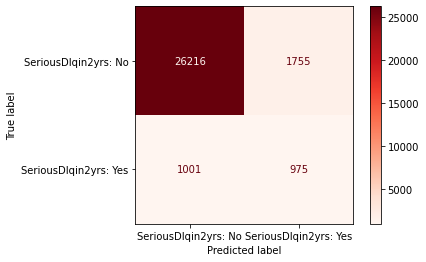

In [101]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test, pred_test)
disp = ConfusionMatrixDisplay(cm, # confusion matrix
                            display_labels=['SeriousDlqin2yrs: No', 'SeriousDlqin2yrs: Yes']) # [Negative label, Positive label]
disp.plot(cmap='Reds') # 출력

(3158,) (3158,) (3158,)


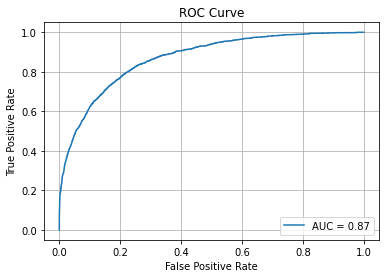

In [102]:
from sklearn.metrics import RocCurveDisplay, roc_curve

voting_pos = voting.predict_proba(X_test)[:, 1]

fprs_voting, tprs_voting, thresholds_voting = roc_curve(y_test, voting_pos)

print(fprs_voting.shape, tprs_voting.shape, thresholds_voting.shape)

auc = roc_auc_score(y_test, pred_test_proba[:, 1])
disp = RocCurveDisplay(fpr=fprs_voting, tpr=tprs_voting, roc_auc=auc)
disp.plot()
plt.legend(loc='lower right')
plt.title('ROC Curve')
plt.grid()

### Results
Base line model중에서 꽤 괜찮은 성능을 보였던 RandomForest, LogisticRegression, Gradient Boosting model을 선정했다. 이 세 가지 모델들을 통해서 GridSearchCV와 RandomGridSearchCV를 이용해 hyper-parameter tuning을 진행했다. 다시 그 best model들을 통해서 validation을 진행했으며, Voting Classifier를 통해서 모델을 완성했다.

결과적으로는 test_data와 ROC_AUC curve를 통해 살펴본 결과, **roc_auc_score**는 **0.87**로 나왔다. 따라서 연체한 사람들에 대해 어느정도 유의미하게 판단할 수 있음을 알 수 있었다.

confusion_matrix를 살펴보면, 연체하지 않은 case에 대한 data를 연체했다고 예측하는 경우가 많았다. 이를 통해 최근 2년 동안 90일 이상 연체하지 않은 비율이 연체한 비율에 비해서 매우 높기 때문에, data적인 측면에서는 연체한 사람들에 대한 case가 더 많이 필요함을 알 수 있었다.

모델의 성능을 더 올리기 위해 다양한 이상치를 처리하거나 제거하는 방법들을 이용해보았지만, 현재의 요소를 통해서는 이 이상의 성능을 내는 것이 어려웠다. 그리고 요소별로 서로의 상관관계가 너무 낮은 것도 모델의 성능을 더 올리기 어려운 이유중 하나라고 생각된다. 마지막으로 Xgboosting, GradientBoosting classifier의 학습 시간이 상당히 오래 걸리는 부분도 모델의 평가를 빠르게 하지 못하게 되어 아쉬운 부분이 있었다.

# Appendix: model save

In [106]:
# 모델저장
import os
import pickle
save_dir = 'saved_model'
os.makedirs(save_dir, exist_ok=True)

xgb_file_path = os.path.join(save_dir, 'xgb_best.pkl')
# best_model_xgb.save_model(xgb_file_path)

gb_file_path = os.path.join(save_dir, 'best_grb.pkl')
with open(gb_file_path, 'wb') as fw:
    pickle.dump(best_grb, fw)

rf_file_path = os.path.join(save_dir, "best_rf.pkl")
with open(rf_file_path, 'wb') as fo:
    pickle.dump(best_rf, fo)

voting_file_path = os.path.join(save_dir, "voting.pkl")
with open(rf_file_path, 'wb') as fo:
    pickle.dump(voting, fo)

In [ ]:
# Load Model
saved_xgb = XGBClassifier()
saved_xgb.load_model(xgb_file_path)